## [Human Stress Detection in and through Sleep 데이터 분석] 
 * 수면의 인간의 스트레스 감지 
 * 데이터 출처 : https://www.kaggle.com/datasets/laavanya/human-stress-detection-in-and-through-sleep?select=SaYoPillow.csv
 
 * 데이터 분석 코드
   * [github 코드](https://github.com/LDJWJ/dataAnalysis/blob/main/01_07_Human_Stress_Detection.ipynb)
   * [HTML코드](https://ldjwj.github.io/dataAnalysis/01_07_Human_Stress_Detection.html)

### 대회 개요
 * 생리학적 데이터를 모니터링하여 수면 중 인간의 스트레스 감지
 * 데이터 파일
   * IEEE-TCE_2020-08-0175_SaYoPillow.pdf
   * readme.docx
   * SaYoPillow.csv

### 데이터 설명

* Input variables 
<pre>
  sr : 코골이 범위
  rr : 호흡수
  t : 체온
  lm : 사지 움직임 속도
  bo : 혈액 산소 수준
  rem : 안구 운동
  sr : 수면 시간
  hr : 심박수 
</pre>

* Output variable
<pre>
  sl 스트레스 수준( 0 - 낮음/보통, 1 - 중간 낮음, 2 - 중간, 3 - 중간 높음, 4 - 높음
</pre>

### 라이브러리 불러오기

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

### 데이터 불러오기

In [2]:
dat = pd.read_csv("./data/HumanStress/SaYoPillow.csv")

dat.shape

(630, 9)

* 데이터 셋 : 630개, 9열

In [8]:
dat.columns

Index(['sr', 'rr', 't', 'lm', 'bo', 'rem', 'sr.1', 'hr', 'sl'], dtype='object')

In [9]:
dat.head()

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


In [10]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sr      630 non-null    float64
 1   rr      630 non-null    float64
 2   t       630 non-null    float64
 3   lm      630 non-null    float64
 4   bo      630 non-null    float64
 5   rem     630 non-null    float64
 6   sr.1    630 non-null    float64
 7   hr      630 non-null    float64
 8   sl      630 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 44.4 KB


* 결측치 없음.
* target columns : sl (스트레스 수준)

In [14]:
# 0 - 낮음/보통, 1 - 중간 낮음, 2 - 중간, 3 - 중간 높음, 4 - 높음
dat.sl.unique()

array([3, 1, 0, 2, 4])

In [15]:
dat.head()

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


### 우선 유의하다고 하는 세개의 특징(피처)을 잡아서, sl(스트레스 수준)를 예측하는 모델을 만들어보자.

#### 01 우선 데이터를 나누고, 
#### 02 모델을 선택 및 학습하고, 이를 토대로 자체 평가를 토대로 모델 최종 선택
#### 03 마지막 선택된 모델로 test의 Transported를 예측하고 제출

### 01 데이터 나누기

In [16]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sr      630 non-null    float64
 1   rr      630 non-null    float64
 2   t       630 non-null    float64
 3   lm      630 non-null    float64
 4   bo      630 non-null    float64
 5   rem     630 non-null    float64
 6   sr.1    630 non-null    float64
 7   hr      630 non-null    float64
 8   sl      630 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 44.4 KB


/Users/toto/Documents/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sl', ylabel='count'>

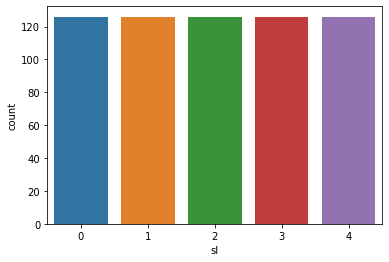

In [17]:
sns.countplot(dat['sl'])

In [18]:
dat['sl'].value_counts()

4    126
3    126
2    126
1    126
0    126
Name: sl, dtype: int64

In [19]:
dat.columns

Index(['sr', 'rr', 't', 'lm', 'bo', 'rem', 'sr.1', 'hr', 'sl'], dtype='object')

### 사용자 코골이 범위(sr), 혈액 산소 수준(bo), 수면 시간(sr.1)을 입력 변수(피처-특징)으로 잡는다.

In [24]:
sel = ['sr', 'bo', 'sr.1']

X = dat[sel]
y = dat['sl']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size=0.2,
                                                   random_state = 0)

X_train.shape, X_test.shape

((504, 3), (126, 3))

In [25]:
### 모델 선택 및 평가

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [27]:
model1 = KNeighborsClassifier()
model1.fit(X_train, y_train)
print("학습용 정확도 : ", model1.score(X_train,y_train) )
print("테스트용 정확도 : ", model1.score(X_test,y_test) )

model2 = DecisionTreeClassifier(max_depth=3, random_state=0)
model2.fit(X_train, y_train)
print("학습용 정확도 : ", model2.score(X_train,y_train) )
print("테스트용 정확도 : ", model2.score(X_test,y_test) )

model3 = RandomForestClassifier(max_depth=3, random_state=0)
model3.fit(X_train, y_train)
print("학습용 정확도 : ", model3.score(X_train,y_train) )
print("테스트용 정확도 : ", model3.score(X_test,y_test) )

학습용 정확도 :  1.0
테스트용 정확도 :  1.0
학습용 정확도 :  1.0
테스트용 정확도 :  0.9920634920634921
학습용 정확도 :  1.0
테스트용 정확도 :  0.9920634920634921


* 거의 100% 가까운 성능을 보여준다.
* 그러면 입력 정보를 3개의 피처에서 1개의 피처로 줄여보면 어떨까? 정말 지금의 정보가 좋은 것인지 확인을 위해

In [32]:
sel = ['sr.1']  # 코골이 범위

X = dat[sel]
y = dat['sl']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size=0.2,
                                                   random_state = 0)

X_train.shape, X_test.shape

((504, 1), (126, 1))

In [ ]:
###

In [33]:
model1 = KNeighborsClassifier()
model1.fit(X_train, y_train)
print("학습용 정확도 : ", model1.score(X_train,y_train) )
print("테스트용 정확도 : ", model1.score(X_test,y_test) )

model2 = DecisionTreeClassifier(max_depth=3, random_state=0)
model2.fit(X_train, y_train)
print("학습용 정확도 : ", model2.score(X_train,y_train) )
print("테스트용 정확도 : ", model2.score(X_test,y_test) )

model3 = RandomForestClassifier(max_depth=3, random_state=0)
model3.fit(X_train, y_train)
print("학습용 정확도 : ", model3.score(X_train,y_train) )
print("테스트용 정확도 : ", model3.score(X_test,y_test) )

학습용 정확도 :  0.9920634920634921
테스트용 정확도 :  0.9920634920634921
학습용 정확도 :  0.9940476190476191
테스트용 정확도 :  0.9920634920634921
학습용 정확도 :  0.9940476190476191
테스트용 정확도 :  0.9920634920634921


### 그래도 최종 모델을 확인해 보자. 추후 ROC-AUC등의 분류의 평가지표를 이용하여 평가 수준을 높여보자.

In [34]:
model1 = RandomForestClassifier(max_depth=3, random_state=0)
model1.fit(X_train, y_train)
print("학습용 정확도 : ", model1.score(X_train,y_train) )
print("테스트용 정확도 : ", model1.score(X_test,y_test) )

학습용 정확도 :  0.9940476190476191
테스트용 정확도 :  0.9920634920634921


* 최종 예측 모델 성능 학습용 99.4%, 테스트용 99.2%로 확인